# 1. Imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Definições

In [20]:
colunas_redundantes = [
    'unidade_cadastro',
    'cod_regulacao',
    'cod_unidade_origem',
    'tipo_regulacao',
    'data_lista_reg',
    'data_vaga_reg',
    'data_admissao_reg',
    'data_lista_hospital',
    'data_vaga_hospital',
    'data_internacao',
    'data_cancel_solicitacao',
    'data_transferencia',
    'gravidez',
    'tipo_internacao_de',
    'data_expiracao',
    'cod_transf_alta',
    'nome_unidade_solicitacao',
    'nome_unidade_destino',
    'via_internacao',
    'idade',
    'faixa_etaria',
    'diff_in_sec',
    'diff_in_min',
    'diff_in_hour',
    'diff_in_day',
    'diff_delay_Rank_vaga_internacao_1',
    'Count',
    'total_repeat_cod',
    'total_repeat',
    'sum_los_hour',
    'sum_outside_hour',
    'cumsum',
    'cumsum.1',
    'cumsum.1(start)',
    'cod_paciente.1',
    'start',
    'stop',
    'uf',
    'municipio',
    'idade',
    'idade_aprox'
]

PATH_INPUT_DATASET = '../data/raw/total dataset with los and outsid time.csv'
PATH_MAPPING_PROFISSAO = "../data/raw/profissoes_mapping.txt"
PATH_OUTPUT_PROCESSED_DATASET = "../data/processed/"
PATH_DE_PARA_CID = '../data/raw/CID_DEPARA.csv'


estado_civil_mapping = {
    'SOLTEIRO': 'solteiro',
    'CASADO': 'casado',
    'NÃO INFORMADO': 'nao informado',
    'viasvo': 'nao informado',
    'SEPARADO': 'solteiro',
    'DIVORCIADO': 'solteiro'
}

etnia_mapping = {
    'BRANCO': 'branco',
    'PARDO': 'pardo',
    'NEGRO': 'preto',
    'NÃO INFORMADO': 'nao informado',
    'AMARELO': 'amarelo',
}

arranjo_domiciliar_mapping = {
    'NÃO INFORMADO': 'nao informado',
    'SOZINHO': 'sozinho',
    'COM COMPANHEIRO ( A)': 'acompanhado',
    'COM FILHOS(AS)': 'acompanhado',
    'COM PAI/MÃE': 'acompanhado',
    'COM OUTROS FAMILIARES': 'acompanhado',
    'OUTRO': 'nao informado',
    'CONHECIDOS/AMIGOS': 'acompanhado'
}

## Funções de apoio

In [34]:
def ler_dataset(path, **kwargs):
    return pd.read_csv(path, **kwargs)

def pegar_mapping_profissao(path):
    with open(path, "r") as arquivo:
        return eval(arquivo.read())

def remover_colunas_redundantes(df, cols_to_drop):
    return df.drop(cols_to_drop, axis=1)

def tratar_colunas_data(df):
    colunas_simples_tratamento = ['data_internacao_real', 'data_cadastro', 'data_solicitacao', 'data_alta']
    colunas_tratamento_regex = ['data_nascimento']
    padrao_data_regex = "(\d{1,2}/\d{1,2}/\d{4})"

    for coluna in colunas_simples_tratamento:
        df[coluna] = pd.to_datetime(df[coluna], format='%m/%d/%Y %H:%M', errors='raise')

    for coluna in colunas_tratamento_regex:
        df[coluna] = pd.to_datetime(df[coluna].str.extract(padrao_data_regex).to_numpy().flat, format='%m/%d/%Y')

    return df

def criar_situacao_profissao(df):
    profissao_mapping = pegar_mapping_profissao(PATH_MAPPING_PROFISSAO)
    
    df['profissao_ocupacao'] = df['profissao_ocupacao'].str.lower()
    df['situacao_profissao'] = df['profissao_ocupacao'].map(lambda x: profissao_mapping.get(x, 'nao informado'))
    df = df.drop('profissao_ocupacao', axis=1)

    return df

def tratar_estado_civil(df):
    df['estado_civil'] = df['estado_civil'].map(estado_civil_mapping)
    return df

def tratar_etnia(df):
    df['etnia'] = df['etnia'].map(etnia_mapping)
    return df

def tratar_arranjo_domiciliar(df):
    df['arranjo_domiciliar'] = df['arranjo_domiciliar'].map(arranjo_domiciliar_mapping)
    return df

def tratar_cid_diagnostico(df):
    cid_df = ler_dataset(PATH_DE_PARA_CID, sep=';', encoding='latin-1')

    df['cid10_diagnostico'] = df['cid10_diagnostico'].str.replace('.', '', regex=False).str.upper()

    #cid_diagnostico_mapping = cid_df.set_index('cid_diagnostico')['cid_diagnostico_descricao'].to_dict()
    #df['cid_diagnostico'] = df['cid_diagnostico'].map(cid_diagnostico_mapping)
    return df

In [37]:
df = ler_dataset(PATH_INPUT_DATASET, encoding="latin1")

tratar_cid_diagnostico(df)[['cid10_diagnostico']]

,cid10_diagnostico
0,NaN
1,NaN
2,F142
3,F142
4,F145
...,...
8750,F192
8751,F322
8752,F322
8753,F445


# 2. Dataprep

In [19]:
df = ler_dataset(PATH_INPUT_DATASET, encoding="latin1")

transformed_df = (
    df
    .pipe(remover_colunas_redundantes, colunas_redundantes)
    .pipe(tratar_colunas_data)
    .pipe(criar_situacao_profissao)
    .pipe(tratar_estado_civil)
    .pipe(tratar_etnia)
    .pipe(tratar_arranjo_domiciliar)
)

transformed_df

,data_internacao_real,data_cadastro,sexo,data_nascimento,cod_paciente,estado_civil,etnia,arranjo_domiciliar,data_solicitacao,cid10_diagnostico,...,cid10_diagnostico_alta,cid10_seg_diagnostico_alta,tipo_alta,tipo_internacao,tempo_espera_internacao,tempo_espera_aceite,grupo_diagnostico_alta,tempo_internacao,event,situacao_profissao
0,2012-07-12 17:37:00,NaT,F,1957-07-30,39,solteiro,branco,nao informado,2012-07-12 17:37:00,NaN,...,F20.0,NaN,CLÃNICA,internacao voluntria,NaN,NaN,TM,1943.383333,1.0,ativa
1,2012-06-25 12:00:00,2012-08-02 00:00:00,F,1971-02-10,40,solteiro,branco,nao informado,2012-06-25 12:00:00,NaN,...,F14.2,F31.0,CLÃNICA,internacao compulsoria,NaN,NaN,AD,1923.150000,1.0,inativa
2,2013-04-12 18:30:00,2012-08-02 00:00:00,F,1971-02-10,40,solteiro,branco,nao informado,2013-02-27 10:46:00,F14.2,...,F14.2,F19.2,CLÃNICA,internacao compulsoria,1063.719444,70.457500,AD,5710.500000,1.0,inativa
3,2014-11-12 10:06:00,2012-08-02 00:00:00,F,1971-02-10,40,solteiro,branco,nao informado,2014-11-06 11:16:00,f14.2,...,F14,F25,CLÃNICA,internacao voluntria,142.819167,21.228333,AD,191.448889,1.0,inativa
4,2015-01-15 12:50:00,2012-08-02 00:00:00,F,1971-02-10,40,solteiro,branco,nao informado,2015-01-08 10:43:00,F14.5,...,F14.9,F25.9,EVASÃO,internacao voluntria,170.104167,96.718333,AD,283.317222,0.0,inativa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8750,2017-12-27 14:27:00,2017-12-27 14:26:00,F,1998-12-27,11064,nao informado,nao informado,nao informado,2017-12-27 14:29:00,F19.2,...,F19.2,NaN,A pedido,internacao involuntria,0.000000,0.000000,AD,77.750000,0.0,nao informada
8751,2017-12-27 14:31:00,2017-12-27 14:31:00,F,1961-05-22,11065,nao informado,nao informado,acompanhado,2017-12-27 14:34:00,F32.2,...,F33.2,NaN,A pedido,internacao involuntria,0.000000,0.000000,TM,52.683333,0.0,nao informada
8752,2017-12-30 12:48:00,2017-12-28 20:21:00,F,2002-08-08,11070,nao informado,nao informado,nao informado,2017-12-28 20:29:00,F32.2,...,F32.2,NaN,CLÃNICA,internacao involuntria,40.305278,16.652500,TM,97.216667,1.0,nao informada
8753,2017-12-29 18:30:00,2017-12-29 17:41:00,F,1951-03-03,11075,nao informado,branco,nao informado,2017-12-29 18:15:00,F44.5,...,F60.4,F60.3,A pedido,internacao voluntria,0.248333,0.363611,TM,589.409722,0.0,inativa


In [68]:
transformed_df.columns

Index(['data_internacao_real', 'data_cadastro', 'sexo', 'data_nascimento',
       'cod_paciente', 'estado_civil', 'etnia', 'arranjo_domiciliar',
       'data_solicitacao', 'cid10_diagnostico', 'cid10_seg_diagnostico',
       'traumatismo', 'prob_respiratorios', 'avc', 'convulsao', 'has',
       'diabetes', 'doenca_infecto', 'status_internacao', 'data_alta',
       'cid10_diagnostico_alta', 'cid10_seg_diagnostico_alta', 'tipo_alta',
       'tipo_internacao', 'tempo_espera_internacao', 'tempo_espera_aceite',
       'grupo_diagnostico_alta', 'tempo_internacao', 'event',
       'situacao_profissao'],
      dtype='object')

In [61]:
transformed_df['sexo'].value_counts() # OK

M    5283
F    3458
T      14
Name: sexo, dtype: int64

In [62]:
transformed_df['estado_civil'].unique()

array(['solteiro', 'casado', 'nao informado'], dtype=object)

In [63]:
transformed_df['etnia'].unique()

array(['branco', 'pardo', 'preto', 'nao informado', 'amarelo'],
      dtype=object)

In [64]:
transformed_df['arranjo_domiciliar'].unique()

array(['nao informado', 'sozinho', 'acompanhado'], dtype=object)

In [71]:
transformed_df['cid10_diagnostico'].str.upper().unique()

array([nan, 'F14.2', 'F14.5', 'F60.3', 'F19.2', 'F14', 'F19.0', 'F32.2',
       'F31.0', 'F30', 'F19.5', 'F79.1', 'F20.0', 'F29', 'F31.2', 'F10.9',
       'F10.2', 'F20', 'F20.8', 'F71.9', 'F20.9', 'F25.0', 'F20.5', 'F25',
       'F31.1', 'F23.0', 'F71.1', 'F71', 'F70', 'F70.1', 'F78', 'F32.3',
       'F31', 'F25.9', 'F25.1', 'F19.6', 'F31.7', 'F31.3', 'F33.2',
       'F32.9', 'F10.0', 'F19', 'F33.3', 'F22.0', 'F32.1', 'F31.8',
       'F70.0', 'F06.8', 'F79.9', 'F71.0', 'F06', 'F60.4', 'F43.1',
       'F06.9', 'F31.5', 'F19.1', 'F31.6', 'F03', 'F12.2', 'F20.1',
       'F14.0', 'F02.8', 'F05', 'F25.2', 'F07.0', 'F23', 'F06.2', 'F72.1',
       'F07', 'F42.0', 'F60.9', 'F04.3', 'F91.1', 'F60', 'X78.9', 'F10',
       'F21.0', 'F23.2', 'F10.5', 'F60.2', 'F28.0', 'F10.3', 'F10.6',
       'F19.8', 'F15', 'F10.8', 'F79', 'F20.3', 'F06.1', 'F30.9', 'F29.0',
       'F23.9', 'F20.2', 'F23.1', 'F14.3', 'F32.0', 'F30.2', 'F31.9',
       'F12.5', 'F33.1', 'F23.3', 'F21', 'E20.9', 'F99', 'F91.8', 'F4

<AxesSubplot:title={'center':'Duplicados'}>

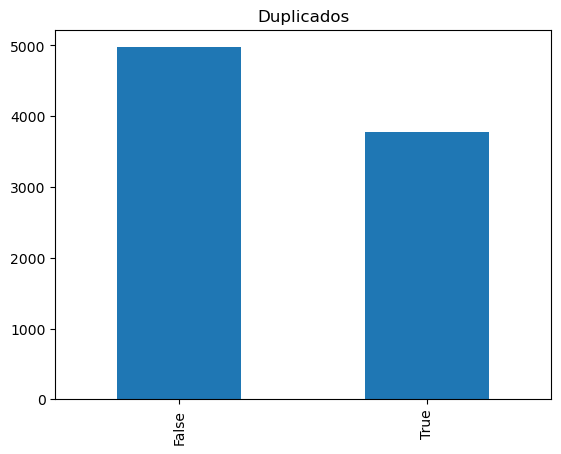

In [81]:
df['cod_paciente'].duplicated().value_counts().plot(kind='bar', title='Duplicados')